In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from datetime import datetime, date, timedelta

In [36]:
# Read in the predictions
pred = pd.read_csv('PredBeta.csv')
# Scrape the actual standings
url = 'https://fbref.com/en/comps/9/Premier-League-Stats'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html')
table = soup.find('table')
standings = pd.read_html(str(table))[0][['Squad']].rename(columns = {'Squad': 'Team'})
# Merge standings and predictions
data = pd.concat([standings, pred], axis = 1)
# Compute by how much each players are off and score
scores = {}
for name in ['Alexis', 'Martin', 'Thomas'] :
    data[f'Off{name}'] = [np.abs(np.where(data[name] == tm)[0][0] - idx) for tm, idx in zip(data.Team, data.index)]
    perfects = (data[f'Off{name}'] == 0).sum()
    scores[name] = (200 - data[f'Off{name}'].sum()) / 2 + perfects

print(scores)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [37]:
data

,Team,Alexis,Martin,Thomas,OffAlexis
0,Arsenal,Arsenal,Man City,Arsenal,0
1,Aston Villa,Aston Villa,Arsenal,Aston Villa,0
2,Bournemouth,Bournemouth,Liverpool,Bournemouth,0
3,Brentford,Brentford,Manchester Utd,Brentford,0
4,Brighton,Brighton,Aston Villa,Brighton,0
5,Burnley,Burnley,Chelsea,Burnley,0
6,Chelsea,Chelsea,Newcastle Utd,Chelsea,0
7,Crystal Palace,Crystal Palace,Brighton,Crystal Palace,0
8,Everton,Everton,Tottenham,Everton,0
9,Fulham,Fulham,Brentford,Fulham,0


In [7]:
pd.read_html(str(table))[0].MP.sum()

0

In [6]:
str(date.today())

'2023-08-09'

In [67]:
pd.DataFrame([[date.today()] + list(scores.values())])

,0,1,2,3
0,2023-08-08,120.0,120.0,120.0


In [93]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'futura'

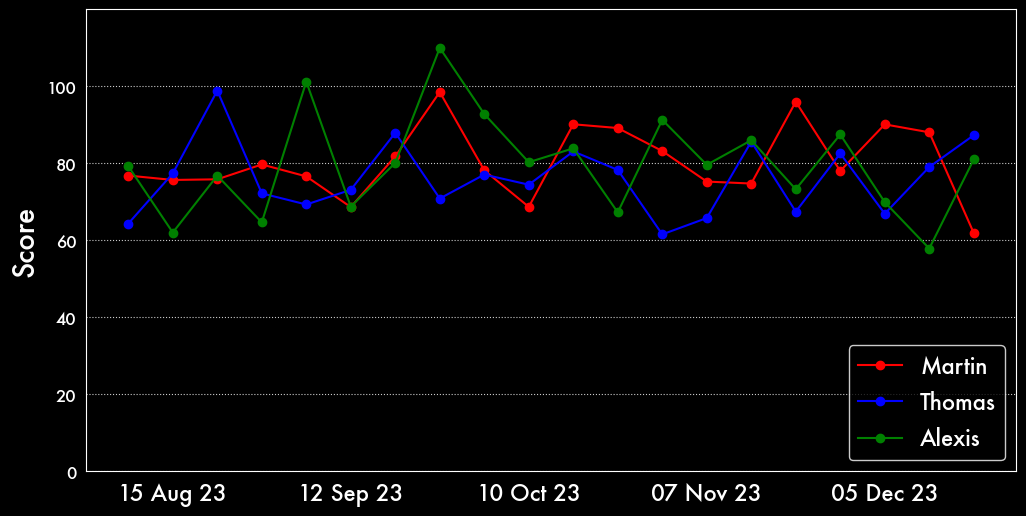

In [124]:
fig, ax = plt.subplots(figsize = (12, 6), facecolor = 'black')

plt.gca().set_facecolor('black')
plt.plot(time, x, c = 'red', marker = 'o', label = 'Martin')
plt.plot(time, y, c = 'blue', marker = 'o', label = 'Thomas')
plt.plot(time, z, c = 'green', marker = 'o', label = 'Alexis')

plt.xticks(time[1::int(len(x)/5)], pd.Series(time).apply(lambda x: datetime.strftime(x, '%d %b %y'))[1::int(len(x)/5)], color = 'white', size = 16)
plt.yticks(np.arange(0, 120, 20), np.arange(0, 120, 20), color = 'white', size = 12)
plt.ylabel('Score', size = 20, color = 'white')

plt.grid(axis = 'y', color = 'white', linestyle = ':', alpha = 0.8)
plt.ylim([0, 120])

ax.spines['left'].set_color('white'); ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white'); ax.spines['top'].set_color('white') 

lgd = plt.legend(edgecolor = 'white', labelcolor = 'white', fontsize = 16, loc = 'lower right')
lgd.get_frame().set_facecolor('black')

plt.show()

In [74]:
x, y, z = np.linspace(80, 80, 20), np.linspace(80, 80, 20), np.linspace(80, 80, 20)

In [75]:
x = x + np.random.normal(0, 10, x.shape)
y = y + np.random.normal(0, 10, y.shape)
z = z + np.random.normal(0, 10, z.shape)

In [101]:
time = [date.today()]
for i in range(19):

    time.append(date.today() + timedelta(days = 7 * (i+1)))

In [125]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage


In [129]:
# Create a MIMEMultipart object
msg = MIMEMultipart()

# Set the sender and recipient addresses
msg['Subject'] = 'Test'

my_mail = 'martinbog19@gmail.com'

# Create the email body as HTML
html = """
<html>
<body>
<p>Hello, this is the text of the email.</p>
<p><img src="cid:image1" alt="Image"></p>
</body>
</html>
"""
msg.attach(MIMEText(html, 'html'))

# Read and attach the image
with open('image.jpg', 'rb') as img_file:
    img = MIMEImage(img_file.read())
    img.add_header('Content-ID', '<image1>')
    msg.attach(img)

In [130]:
# Set up the SMTP server and send the email
smtp_username = 'your_email@example.com'
smtp_password = 'your_email_password'

try:
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.starttls()
    server.login(my_mail, 'khnmjafadwysyyvd')
    server.sendmail(my_mail, my_mail, msg.as_string())
    print("Email sent successfully!")
except Exception as e:
    print("Error sending email:", str(e))
finally:
    server.quit()

Email sent successfully!


In [10]:
import os
os.listdir('results/')

[]

In [13]:
['Alexis', 'Martin', 'Thomas'][np.argmax([80, 80, 60])]

'Alexis'

In [52]:
l = [90, 90, 80]
leaders = list(np.array(['Alexis', 'Martin', 'Thomas'])[(np.argwhere(l == np.max(l)).flatten())])
mult = len(leaders) > 1
print(f'{" & ".join(leaders)} {mult*"are"}{(1 - mult) * "is"} leading the way with {np.max(l)} points!')

Alexis & Martin are leading the way with 90% !


In [24]:
names = ['Alexis', 'Martin', 'Thomas']
scores = [100, 120, 110]

In [25]:
comb = zip(names, scores)

In [26]:
sortedc= sorted(comb, key = lambda x: x[1], reverse = True)

In [27]:
sorted_names, sorted_scores = zip(*sortedc)

In [28]:
sorted_names

('Martin', 'Thomas', 'Alexis')

In [29]:
sorted_scores

(120, 110, 100)

In [35]:
np.where(np.array(sorted_names) == 'Martin')[0][0]

0

In [34]:
np.array(sorted_names)

array(['Martin', 'Thomas', 'Alexis'], dtype='<U6')